In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from glob import glob
import cv2

In [4]:
pics = glob(r'../Data/Raw/*.JPG')
len(pics)

27

In [9]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = cv2.imread(filename)
    # plot the image
    plt.imshow(cv2.cvtColor(data, cv2.COLOR_BGR2RGB))
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    plt.show()

def draw_faces(filename, result_list):
    # load the image
    data = cv2.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(cv2.cvtColor(data[y1:y2, x1:x2], cv2.COLOR_BGR2RGB))
    # show the plot
    pyplot.show()

In [23]:
# load image from file
pixels = cv2.imread(pics[4])
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)

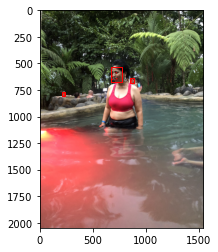

In [24]:
# display faces on the original image
draw_image_with_boxes(pics[4], faces)

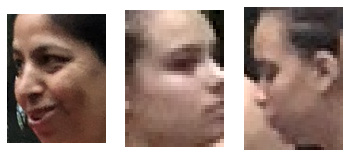

In [25]:
draw_faces(pics[4], faces)